# Decison Trees

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences
### Aim
To create a decision making model using Decision Tree technique for prediciting whether a project will be approved by the City Counsil.

### Data 
The data is about a list of the projects and its parameters used by the City Council for approval for the Financial Year 2018. <br> The parameters used are its priority, budget (in Euros), division, duration (in days)

**Note**: The data used is generated in Excel sheet.

### Libraries used 

In [13]:
import numpy as np
import pandas as pd
import pydot 
from sklearn import tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  

### Loading Data from CSV

In [14]:
input_file = "Data/ProjectBudgetApproval.csv"
df = pd.read_csv(input_file, header = 0)

### Sample Data

In [15]:
df.head()

,Name,Priority,Budget,Division,Duration,Approved
0,Brigde,Medium,24855,Central,40,Y
1,Mall,High,24598,South,40,Y
2,School,Medium,26098,North,100,N
3,Hospital,High,75519,East,80,N
4,Road,High,28189,Central,120,N


The data is about a list of the projects and its parameters used by the City Council for **approval** for the Financial Year 2018.
The parameters used are its **priority, budget (in Euros), division, duration (in days)**

### Size of the Data

In [16]:
df.shape

(20, 6)

A list of 20 past projects is what we recieved in the dataset.

### Mapping

The data recieved have non integer values, so we need to map those to numerical values for computational process. 

In [17]:
d = {'Y': 1, 'N': 0}
df['Approved'] = df['Approved'].map(d)

d = {'High': 1, 'Medium': 2,  'Low': 3 }
df['Priority'] = df['Priority'].map(d)

d = {'North': 1, 'South': 2,  'East': 3 , 'West': 4 , 'Central': 5 }
df['Division'] = df['Division'].map(d)

df =df.drop(['Name'], axis=1)
df.head()

,Priority,Budget,Division,Duration,Approved
0,2,24855,5,40,1
1,1,24598,2,40,1
2,2,26098,1,100,0
3,1,75519,3,80,0
4,1,28189,5,120,0


### Extracting feature names 

In [18]:
features = list(df.columns[:4])
features

['Priority', 'Budget', 'Division', 'Duration']

### Separating parameters and results

Now actually construct the decision tree:

In [19]:
y = df["Approved"]
X = df[features]

### Creating the Model
DecisionTreeClassifier is used from tree module of sklearn


In [20]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

### Displaying the decision Tree model currently made

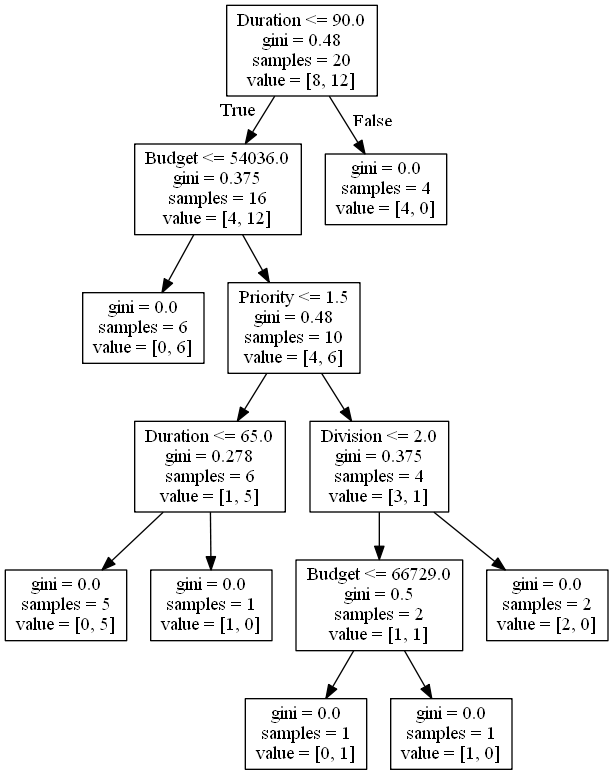

In [21]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)   
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png()) 

#### Observation
The Duration is considered at a higher priority on this model, where any project with duration larger than 90 is rejected. <br>
Second parameter used is the budget where if the budget is less than 54036, the project is approved. <br> Similarily we can analyse the Decision Tree.

### Predictions

The use case here is to check if a project will be approved by the City counsil for the following proposed projects : <br>

1) Bus stand - Priority : Medium , Budget : 35000 Euros, Division : South, Duration: 50 days <br>
2) By pass Road - Priority : High, Budget : 55000 Euros, Division : East, DUration: 100 days

In [22]:
### Predicting project approval 
print (clf.predict([[2, 35000, 2, 50]]))

print (clf.predict([[1, 55000, 3, 100]]))

[1]
[0]


### Conclusion

The Decision Tree was used to create a model to predict whether a project will be approved by the City Council based on the parameters of a porject such as priority, budget, duration and zone.